In [1]:
# import numpy as np
# import pandas as pd
# import os

# for dirname, _, filenames in os.walk('dataMed/Drug Vision/Data Combined'):
#     for filename in filenames:
#         continue
#         #print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
import os

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [4]:
path='dataMed_3/Drug Vision/Data Combined'
os.listdir(path)

['Alaxan',
 'Bactidol',
 'Bioflu',
 'Biogesic',
 'DayZinc',
 'Decolgen',
 'Fish Oil',
 'Kremil S',
 'Medicol',
 'Neozep']

In [5]:
# Define the dataset path and create a Path object
dataset = path
image_dir = Path(dataset)

# Collect image file paths for JPG and JPEG formats
filepaths = list(image_dir.glob("**/*.JPG")) + list(image_dir.glob("**/*.jpeg"))

print(len(filepaths))
# Extract labels from the file paths by getting the parent directory name
labels = [x.parent.name for x in filepaths]

# Create a DataFrame with file paths and labels
image_df = pd.DataFrame({
    'filepath': [str(fp) for fp in filepaths],
    'label': labels
})

10000


In [6]:
# # Define the dataset path and create a Path object
# dataset = path
# image_dir = Path(dataset)

# # Collect image file paths for JPG and JPEG formats
# filepaths = list(image_dir.glob("**/*.JPG")) + list(image_dir.glob("**/*.jpg")) + list(image_dir.glob("**/*.jpeg"))

# # Extract labels from the file paths by getting the parent directory name
# labels = [x.parent.name for x in filepaths]

# # Create a DataFrame with file paths and labels
# image_df = pd.DataFrame({
#     'filepath': [str(fp) for fp in filepaths],
#     'label': labels
# })

In [7]:
# print(image_df.sample(2),'\n')
# print(image_df.info(),'\n')
# print(image_df.label.unique(),'\n')
# print(image_df['label'].value_counts())

In [8]:
print(image_df.sample(2),'\n')
print(image_df.info(),'\n')
print(image_df.label.unique(),'\n')
print(image_df['label'].value_counts())
image_df

                                               filepath     label
7843  dataMed_3\Drug Vision\Data Combined\Kremil S\0...  Kremil S
160   dataMed_3\Drug Vision\Data Combined\Alaxan\000...    Alaxan 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  10000 non-null  object
 1   label     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB
None 

['Alaxan' 'Bactidol' 'Bioflu' 'Biogesic' 'DayZinc' 'Decolgen' 'Fish Oil'
 'Kremil S' 'Medicol' 'Neozep'] 

label
Alaxan      1000
Bactidol    1000
Bioflu      1000
Biogesic    1000
DayZinc     1000
Decolgen    1000
Fish Oil    1000
Kremil S    1000
Medicol     1000
Neozep      1000
Name: count, dtype: int64


filepath   label
0     dataMed_3\Drug Vision\Data Combined\Alaxan\000...  Alaxan
1     dataMed_3\Drug Vision\Data Combined\Alaxan\000...  Alaxan
2     dataMed_3\Drug Vision\Data Combined\Alaxan\000...  Alaxan
3     dataMed_3\Drug Vision\Data Combined\Alaxan\000...  Alaxan
4     dataMed_3\Drug Vision\Data Combined\Alaxan\000...  Alaxan
...                                                 ...     ...
9995  dataMed_3\Drug Vision\Data Combined\Neozep\000...  Neozep
9996  dataMed_3\Drug Vision\Data Combined\Neozep\000...  Neozep
9997  dataMed_3\Drug Vision\Data Combined\Neozep\000...  Neozep
9998  dataMed_3\Drug Vision\Data Combined\Neozep\000...  Neozep
9999  dataMed_3\Drug Vision\Data Combined\Neozep\000...  Neozep

[10000 rows x 2 columns]

In [9]:
# # Define the path to your dataset (adjust this path accordingly)
# dataset_path = 'dataMed_3/Drug Vision/Data Combined'

# # List all class directories
# class_names = os.listdir(dataset_path)

# # Initialize a dictionary to store the number of images per class
# image_counts = {}

# # Count the number of images in each class
# for class_name in class_names:
#     class_path = os.path.join(dataset_path, class_name)
#     if os.path.isdir(class_path):  # Ensure it's a directory
#         image_count = len([f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))])  # You can adjust image extensions
#         image_counts[class_name] = image_count

# # Display the counts in the notebook
# print("Number of images in each class:")
# for class_name, count in image_counts.items():
#     print(f"{class_name}: {count} images")

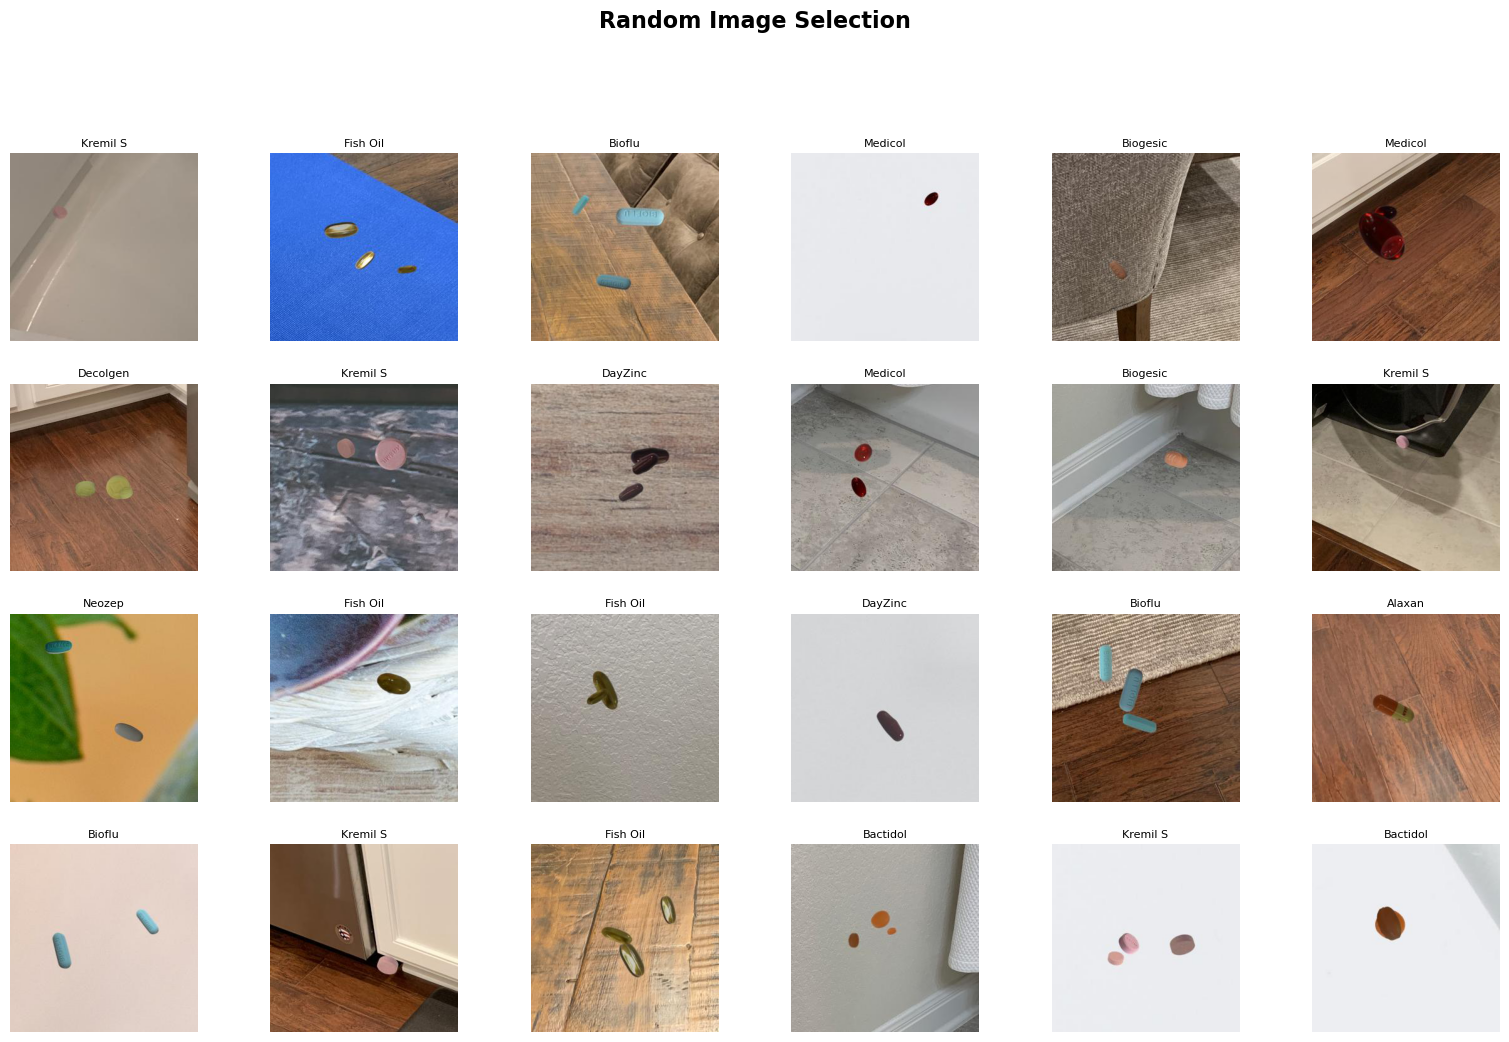

In [10]:
# Select 24 random indices
random_index = np.random.randint(0, len(image_df), 24)

# Create a 4x6 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 10))

# Place the randomly selected image and its label in each subplot
for i, ax in enumerate(axes.flat):
    # Get the file path and label for the randomly selected index
    img_path = image_df.filepath.iloc[random_index[i]]
    label = image_df.label.iloc[random_index[i]]

    # Read and display the image
    img = plt.imread(img_path)
    ax.imshow(img)

    # Add a title with a small font and remove the axis lines
    ax.set_title(label, fontsize=8, pad=5)
    ax.axis('off')
# Add a main title for the entire figure
plt.suptitle("Random Image Selection", fontsize=16, fontweight='bold', y=1.05)

# Adjust the layout for better spacing and display the plot
plt.tight_layout(pad=2.0)
plt.show()

In [11]:
# Data splitting
train_df, test_df = train_test_split(image_df, test_size=0.2, stratify=image_df.label, random_state=42)
print(f"\nTrain shape: {train_df.shape}, Test shape: {test_df.shape}")

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Create data generators
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    subset='validation'
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

# Model configuration
num_classes = len(image_df.label.unique())

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False  # Freeze base model


Train shape: (8000, 2), Test shape: (2000, 2)
Found 6400 validated image filenames belonging to 10 classes.
Found 1600 validated image filenames belonging to 10 classes.
Found 2000 validated image filenames belonging to 10 classes.


In [12]:
# Custom head
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Model compilation
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,047,754 (11.63 MB)

 Trainable params: 789,770 (3.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
# Callbacks
checkpoint = ModelCheckpoint(
    'best_model.weights.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [15]:
# Model training
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.4203 - loss: 1.6530 - precision: 0.7718 - recall: 0.1470 - val_accuracy: 0.6706 - val_loss: 1.0982 - val_precision: 0.9342 - val_recall: 0.3725
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.5675 - loss: 1.2561 - precision: 0.8037 - recall: 0.3658 - val_accuracy: 0.7275 - val_loss: 0.8942 - val_precision: 0.9168 - val_recall: 0.5231
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.6359 - loss: 1.0665 - precision: 0.8148 - recall: 0.4791 - val_accuracy: 0.7369 - val_loss: 0.7987 - val_precision: 0.8894 - val_recall: 0.5931
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.6747 - loss: 0.9476 - precision: 0.8340 - recall: 0.5426 - val_accuracy: 0.7663 - val_loss: 0.7283 - val_precision: 0.8940 - val_recall: 0.6481
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.7082 - loss: 0.8418 - precision: 0.8361 - recall: 0.6023 - val_accuracy: 0.7800 - val_los

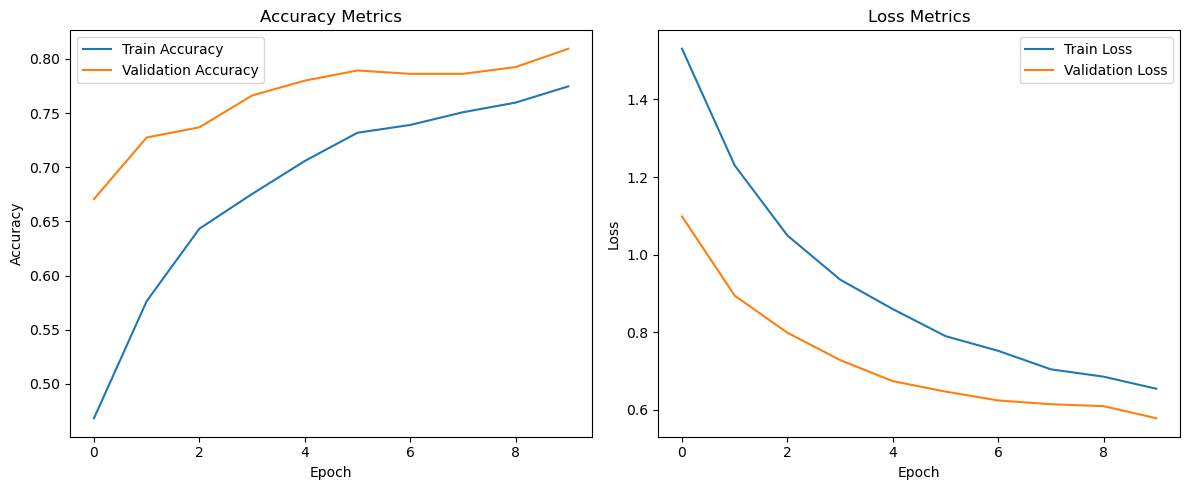

In [16]:
# Training visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Metrics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Metrics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# Model evaluation
test_results = model.evaluate(test_gen, verbose=0)
print(f"\nTest Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")

# Predictions and classification report
y_true = test_gen.classes
y_pred = model.predict(test_gen).argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))



Test Loss: 0.4985
Test Accuracy: 0.8290
Test Precision: 0.8970
Test Recall: 0.7665
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step

Classification Report:
              precision    recall  f1-score   support

      Alaxan       0.74      0.84      0.79       200
    Bactidol       0.85      0.75      0.80       200
      Bioflu       0.78      0.92      0.84       200
    Biogesic       0.74      0.76      0.75       200
     DayZinc       0.88      0.85      0.87       200
    Decolgen       0.87      0.90      0.88       200
    Fish Oil       0.88      0.92      0.90       200
    Kremil S       0.79      0.81      0.80       200
     Medicol       0.92      0.90      0.91       200
      Neozep       0.88      0.64      0.74       200

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [ ]:
# # Model Save 
# model.save('dataMed_3/Drug Vision/Data Combined.h5')

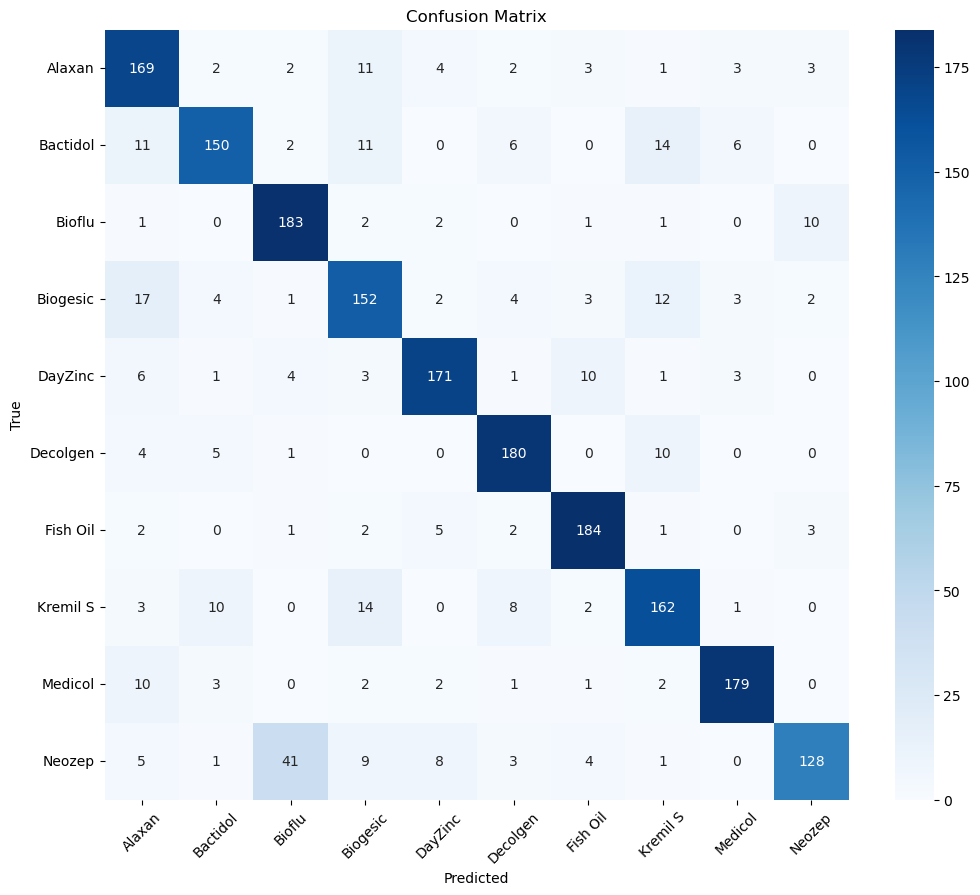

In [18]:
# Confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_true, y_pred), 
            annot=True, fmt='d', 
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys(),
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [23]:
# # # # Model Save 
model.save('dataMed_3/Drug Vision/Data Combined.keras')

In [21]:
# # Model Save 
# model.save('pharmaceutical_drugs_and_vitamins_classification_model.h5')

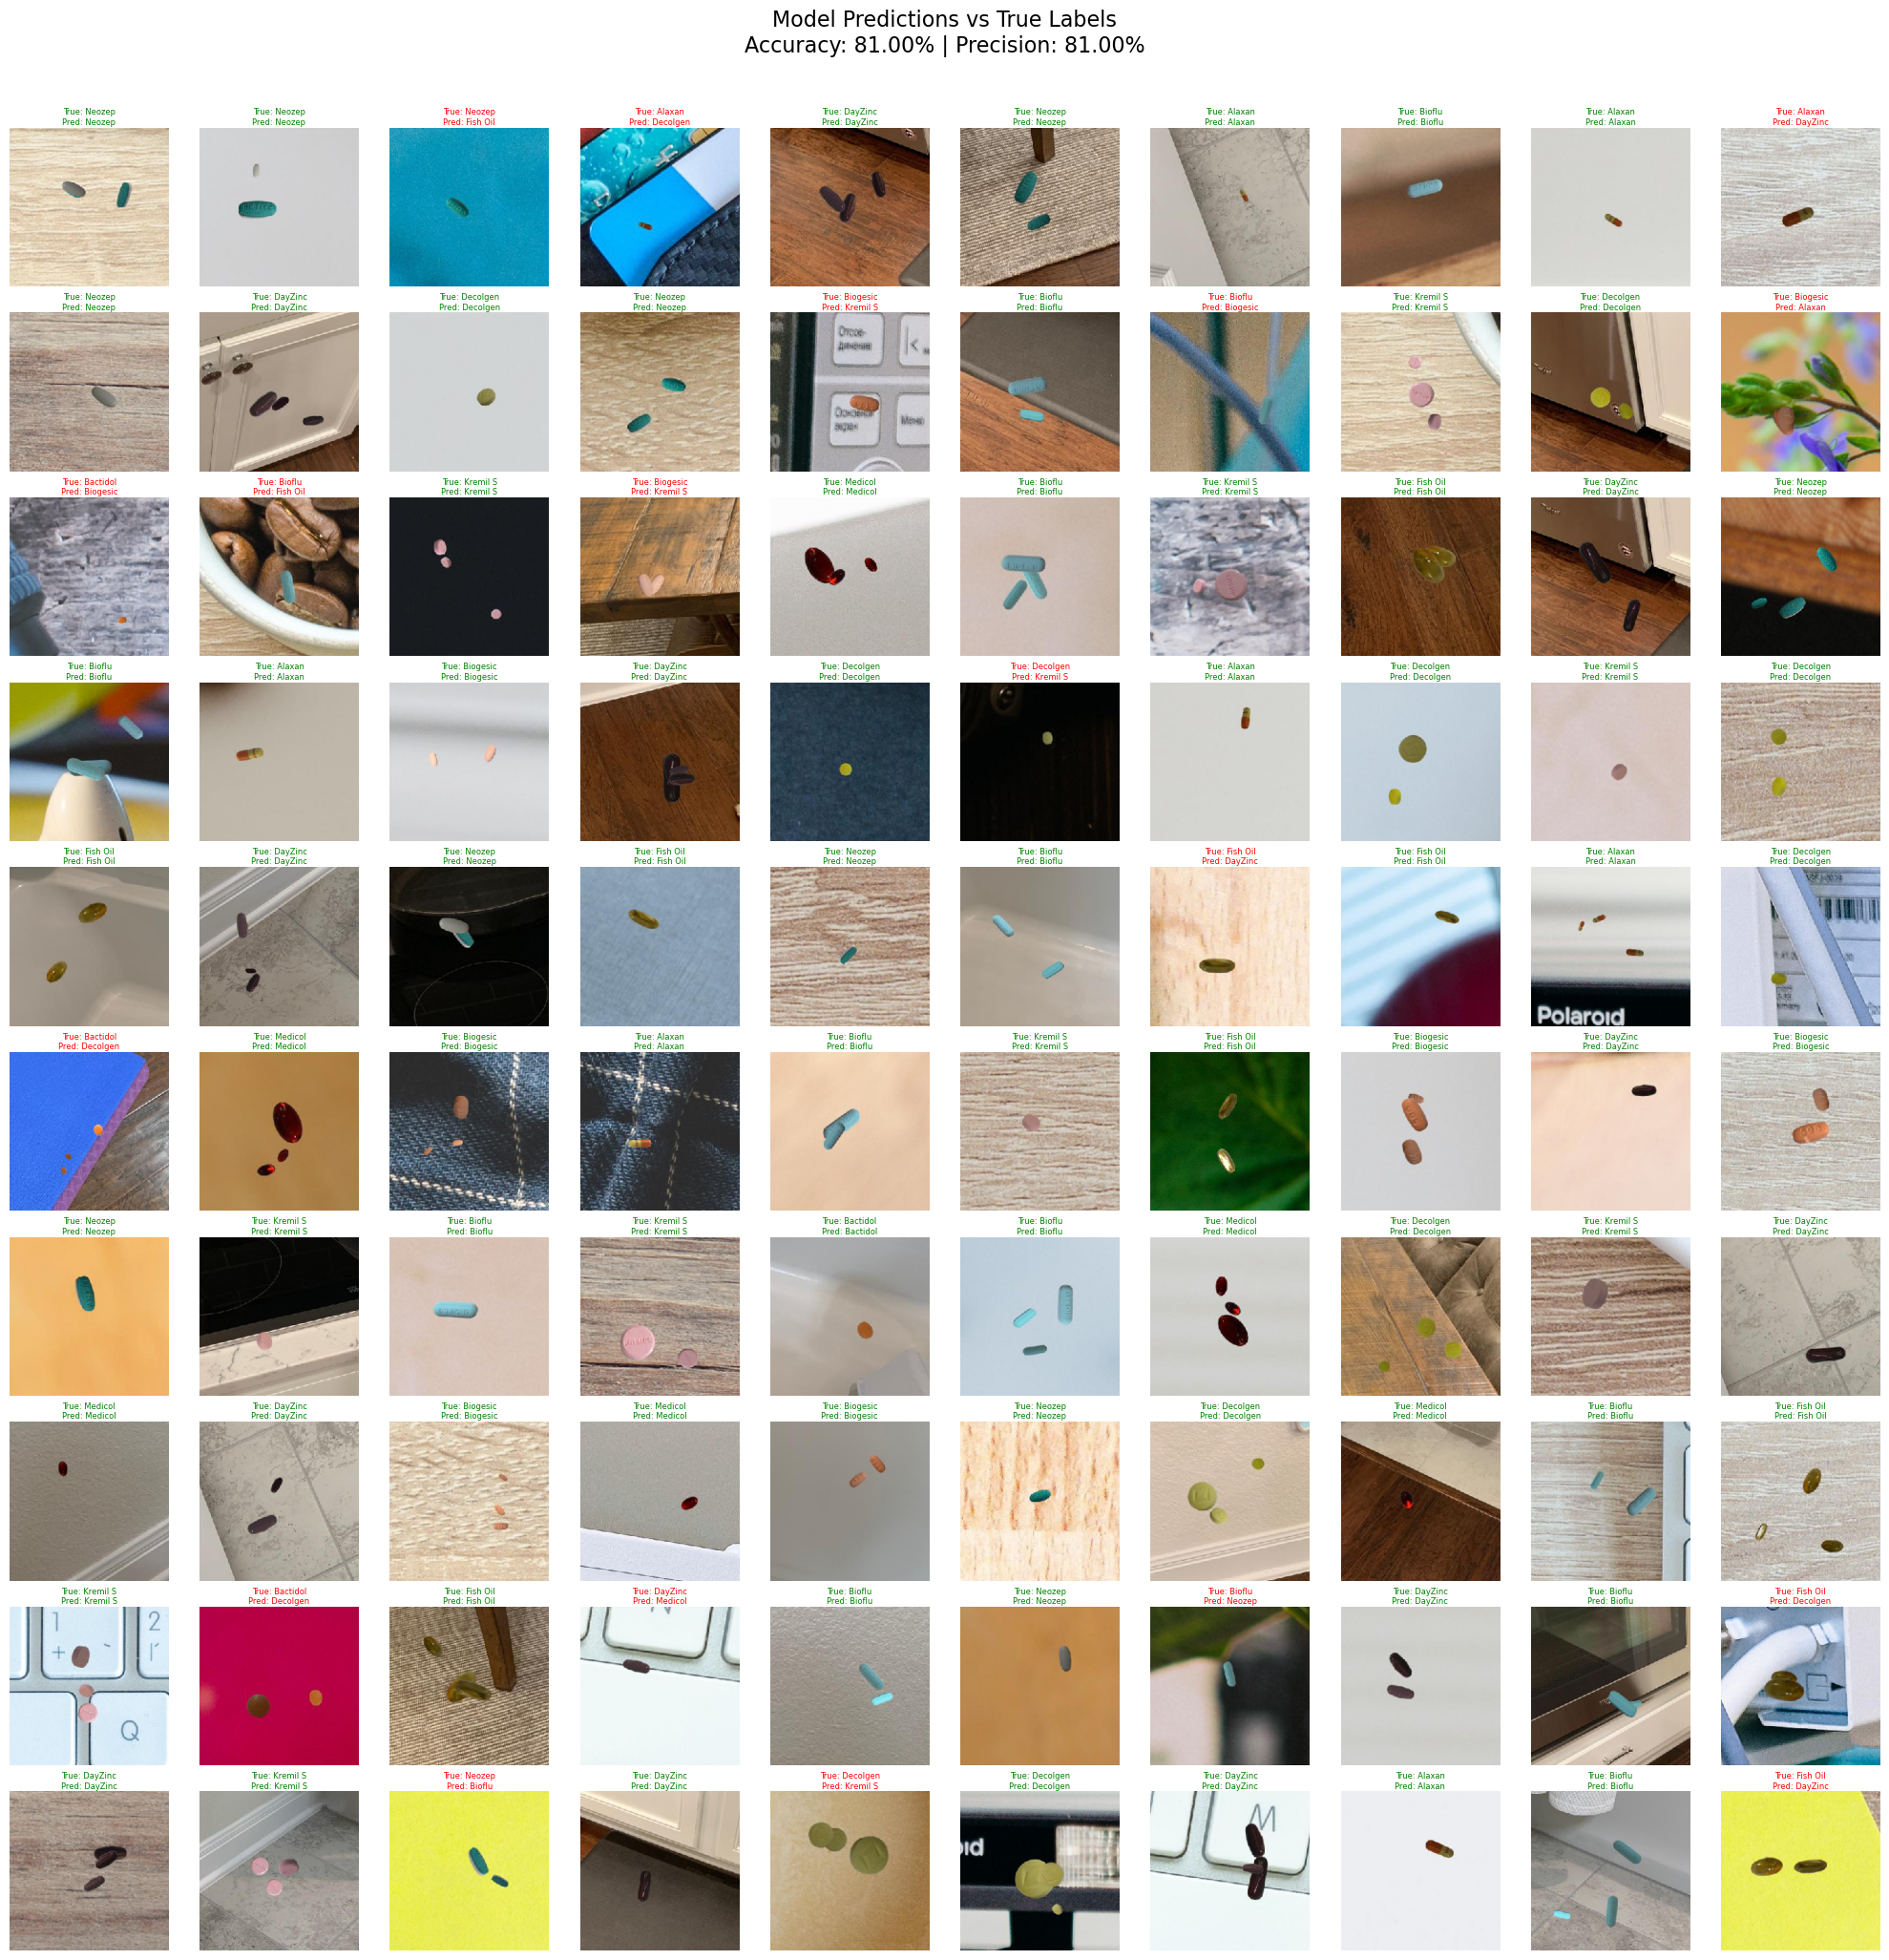

In [22]:
# Reverse the class_indices dictionary to map indices back to class names
class_indices = test_gen.class_indices
class_indices_reverse = {v: k for k, v in class_indices.items()}

# Select 100 random samples from the test dataset
random_indices = np.random.choice(len(test_df), 100, replace=False)
test_samples = test_df.iloc[random_indices]

# Initialize counters for correct predictions
correct_predictions = 0
total_predictions = len(test_samples)
# Create a 10x10 grid for visualization
plt.figure(figsize=(20, 20))
for i, (idx, row) in enumerate(test_samples.iterrows()):
    # Read and preprocess the image
    img = tf.keras.preprocessing.image.load_img(row['filepath'], target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    pred = model.predict(img_array, verbose=0)
    pred_label = class_indices_reverse[np.argmax(pred)]  # Get predicted label
    true_label = row['label']  # Get true label

    # Check if the prediction is correct
    if pred_label == true_label:
        correct_predictions += 1

    # Plot the image with predicted and true labels
    plt.subplot(10, 10, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=6, 
              color='green' if pred_label == true_label else 'red', pad=2)
    plt.axis('off')

# Calculate accuracy and precision
accuracy = (correct_predictions / total_predictions) * 100
precision = (correct_predictions / total_predictions) * 100  # Assuming binary classification

# Add a main title with accuracy and precision
plt.suptitle(
    f"Model Predictions vs True Labels\nAccuracy: {accuracy:.2f}% | Precision: {precision:.2f}%", 
    fontsize=16, y=1.02
)

# Adjust layout to reduce spacing
plt.tight_layout(pad=0.5)
plt.show()
